<a href="https://colab.research.google.com/github/sirius59/astro_obs/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/sirius59/astro_obs/e4b11d2b24b75b9857a481b7786d28758a474803/B.txt -q
!wget https://raw.githubusercontent.com/sirius59/astro_obs/e4b11d2b24b75b9857a481b7786d28758a474803/R.txt -q
!wget https://raw.githubusercontent.com/sirius59/astro_obs/e4b11d2b24b75b9857a481b7786d28758a474803/V.txt -q

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
R_data=np.loadtxt('/content/R.txt')
V_data=np.loadtxt('/content/V.txt')
B_data=np.loadtxt('/content/B.txt')
wavelength=R_data[:,0]
R=R_data[:,1]
V=V_data[:,1]
B=B_data[:,1]

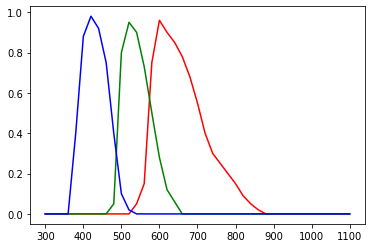

In [4]:
plt.plot(wavelength,R,'-r')
plt.plot(wavelength,V,'-g')
plt.plot(wavelength,B,'-b')
plt.show()

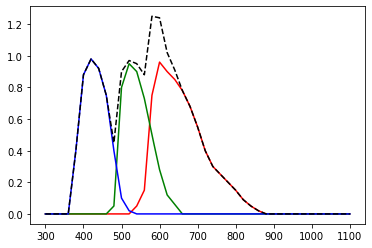

In [5]:
total_transmitivity=R+V+B
plt.plot(wavelength,R,'-r')
plt.plot(wavelength,V,'-g')
plt.plot(wavelength,B,'-b')
plt.plot(wavelength,total_transmitivity,'--k')
plt.show()

In [6]:
total_flux=np.trapz(total_transmitivity,x=wavelength)#integrated total flux
print(total_flux)

319.4000000677


In [7]:
R_flux=np.trapz(R,x=wavelength)#integrated flux on the red filter
V_flux=np.trapz(V,x=wavelength)#same but green
B_flux=np.trapz(B,x=wavelength)#and blue

In [8]:
ratio_R=R_flux/total_flux
ratio_V=V_flux/total_flux
ratio_B=B_flux/total_flux

print(f' le ratio de rouge est de {ratio_R*100} %\n le ratio de vert est de {ratio_V*100} %\n le ratio de bleu est de {ratio_B*100} %')

 le ratio de rouge est de 44.64621165564324 %
 le ratio de vert est de 27.48904204160611 %
 le ratio de bleu est de 27.864746302750643 %


problem : yellowish color due to the superimposition of the red and green filter leading to an over representation of the yellow color (let assume that the superimposition of red and blue is negligeable)

0.385507983967599
0.07784126485356965


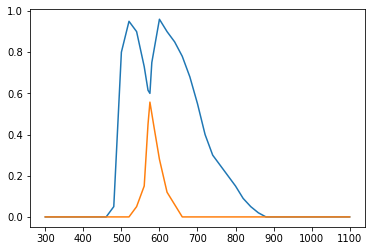

In [9]:
#let's do the Red

courbe_top=[]
courbe_bot=[]
for k in range(len(wavelength)):
  courbe_top.append(max(R[k],V[k]))
  courbe_bot.append(min(R[k],V[k]))
plt.plot(wavelength,courbe_top)
plt.plot(wavelength,courbe_bot)
cutoff2=np.argmax(courbe_bot)
real_R_flux=np.trapz(R[:cutoff2],x=wavelength[:cutoff2])+np.trapz((R-V)[cutoff2:],x=wavelength[cutoff2:])
print(real_R_flux/total_flux)
print(np.trapz(courbe_bot,x=wavelength)/total_flux)

0.27033108865074695
0.017493738142347132


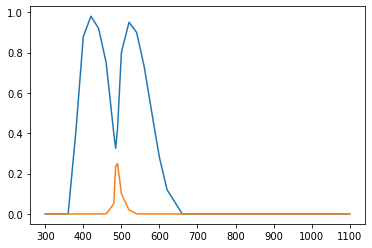

In [10]:
#let's do the Blue

courbe_top=[]
courbe_bot=[]
for k in range(len(wavelength)):
  courbe_top.append(max(V[k],B[k]))
  courbe_bot.append(min(V[k],B[k]))
plt.plot(wavelength,courbe_top)
plt.plot(wavelength,courbe_bot)
cutoff1=np.argmax(courbe_bot)
real_B_flux=np.trapz((B-V)[:cutoff1],x=wavelength[:cutoff1])+np.trapz(B[cutoff1:],x=wavelength[cutoff1:])
print(real_B_flux/total_flux)
print(np.trapz(courbe_bot,x=wavelength)/total_flux)

In [11]:
#let's do the green

real_V_flux=np.trapz(V[:cutoff1],x=wavelength[:cutoff1])+np.trapz((V-B)[cutoff1:cutoff2],x=wavelength[cutoff1:cutoff2])+np.trapz(V[cutoff2:],x=wavelength[cutoff2:])
print(real_V_flux/total_flux)


0.2506653107629304


0.4261334142961861
0.2770808106791369
0.29881899879622154


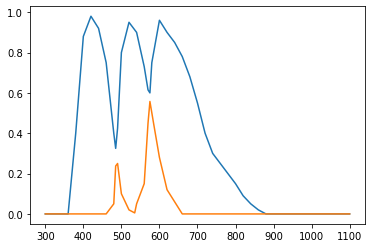

In [12]:
courbe_top=[]
courbe_bot=[]
for k in range(len(wavelength)):
  courbe_top.append(max(V[k],B[k],R[k]))
  courbe_bot.append(min(V[k],B[k]) or min(R[k],V[k]))
plt.plot(wavelength,courbe_top)
plt.plot(wavelength,courbe_bot)
print(real_R_flux/np.trapz(courbe_top,x=wavelength))
print(real_V_flux/np.trapz(courbe_top,x=wavelength))
print(real_B_flux/np.trapz(courbe_top,x=wavelength))


In [13]:
print((real_B_flux+real_R_flux+real_V_flux)/np.trapz(courbe_top,x=wavelength))

1.0020332237715446
